In [1]:
import subprocess 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import itertools
import random
import math

## Generación de prueba

In [2]:
input_path = "../datos_entrada/ej2/"

In [3]:
def combinacionValida(n,ejes):
    for i in range(n,1,-1):
        if len([(x,y) for x,y in ejes if y == i or x == i]) == 0:
            return False
    return True
        

In [7]:
repeticiones=10
tamanios=range(4,13,4)
files = []
caracteristicas = {
    "cercanos": [0.1,0.3],
    "intermedios": [0.4,0.6],
    "lejanos": [0.8,1]
}
for n in tamanios:
    ejes_posibles = list(itertools.combinations(range(1,n+1),2))
    
    m = random.randint(1,len(ejes_posibles))
    
    random.shuffle(ejes_posibles)
    while not combinacionValida(n,ejes_posibles[0:m]):
        m = m + 1
    ejes = ejes_posibles[0:m]
    
    file = {
        "n": n,
        "m": m,
        "name": f"exp_distancias_{n}nodos_{m}ejes_[caracteristica].txt",
        "absPath": os.path.abspath(f"{input_path}/exp_distancias_{n}nodos_{m}ejes_[caracteristica].txt")
    }
    costos = []
    for i in range(0,n):
        costos.append(random.randint(1,100))
                    
    for caracteristica,indice in caracteristicas.items():
        fileName = file["absPath"].replace("[caracteristica]",caracteristica)
        with open(fileName, "w") as f:
            f.write(f"{n} {m}\n")
            for costo in costos:
                f.write(f"{costo}\n")
            for (src,dest) in ejes:
                distancia = random.randint(100*indice[0],100*indice[1])
                f.write(f"{src} {dest} {distancia}\n")
    files.append(file)

In [14]:
def run(fileName, metodo):
    completado = subprocess.run(["../../Resolucion/bin/ej2",fileName,str(metodo)], stdout=subprocess.PIPE, universal_newlines=True)
    if completado.returncode != 0:
        return "ERROR: El programa finalizo de forma incorrecta"
    else:
        return completado.stdout

resultFile = f"{input_path}/results.txt"
tiempos = "./ej2_tiempos.csv"
with open(resultFile,"a+") as f:
    for file in files:
        for caracteristica in caracteristicas.keys():
            fileName = file["absPath"].replace("[caracteristica]",caracteristica)
            for i in range(1,repeticiones):
                print(f"ejecuto {i} repeticion de {fileName}")
#                 if(file["n"] < 5):
#                     f.write(run(fileName, 0)) #Dijkstra Arreglo
                f.write(run(fileName, 1)) #Dijkstra Cola
                f.write(run(fileName, 2)) #BellmanFord
                f.write(run(fileName, 3)) #FloydWarshall    

ejecuto 1 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 2 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 3 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 4 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 5 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 6 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_4nodos_2ejes_cercanos.txt
ejecuto 7 

ejecuto 6 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_8nodos_13ejes_lejanos.txt
ejecuto 7 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_8nodos_13ejes_lejanos.txt
ejecuto 8 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_8nodos_13ejes_lejanos.txt
ejecuto 9 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_8nodos_13ejes_lejanos.txt
ejecuto 1 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_12nodos_32ejes_cercanos.txt
ejecuto 2 repeticion de /home/ezequiel/Documents/GitRepos/Facu/Algo3_2019c1/tp2/Algo3-TP2/Experimentacion/datos_entrada/ej2/exp_distancias_12nodos_32ejes_cercanos.txt
ejecut

In [5]:
csv = pandas.read_csv(tiempos)

In [6]:
plt.clf()
for method in csv["Metodo"].unique():
    for caracteristica in caracteristicas.keys():
        csvOnlyNames = csv.dropna(subset=['Filename'])
        
        methodResults = csvOnlyNames[(csvOnlyNames["Metodo"]==method) & (csvOnlyNames['Filename'].str.endswith(f"{caracteristica}.txt"))]
        resultsByN = [np.median(methodResults[methodResults["n"] == n]["Tiempo"]) for n in tamanios]
        
        plt.scatter(tamanios,resultsByN,label=f"{method}-{caracteristica}")
        plt.plot(tamanios,resultsByN, linestyle='-')


plt.legend();
plt.xlabel("Valor de N")
plt.ylabel("Tiempo");

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

NameError: name 'caracteristicas' is not defined

<Figure size 432x288 with 0 Axes>

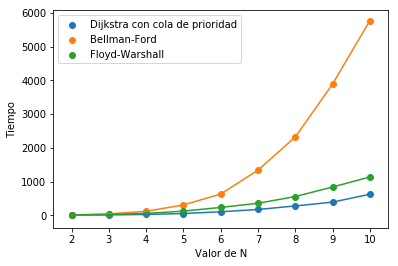

In [8]:
plt.clf()
for method in csv["Metodo"].unique():
    if method != "Dijkstra":
        csvOnlyNames = csv.dropna(subset=['Filename'])
        methodResults = csvOnlyNames[csvOnlyNames["Metodo"]==method]
        resultsByN = [np.median(methodResults[methodResults["n"] == n]["Tiempo"]) for n in tamanios]
        plt.scatter(tamanios,resultsByN,label=method)
        plt.plot(tamanios,resultsByN, linestyle='-')

plt.legend();
plt.xlabel("Valor de N")
plt.ylabel("Tiempo");

### Corelación entre tiempo de ejecución y cota de algortimo para cada una de estructuras

In [9]:
csv["nodosEnH"] = csv["n"] * 60
csv["logNodosEnH"] = np.log(csv["nodosEnH"])

csv["cotaDijkstra-Arreglo"] = csv["n"] * csv["nodosEnH"]**3
csv["cotaDijkstra-Cola"] = csv["n"] * csv["nodosEnH"]**2 * csv["logNodosEnH"]
csv["cotaFloyd"] = csv["n"] * csv["nodosEnH"]**2
csv["cotaBellman"] = csv["n"] * csv["nodosEnH"]**3

csvDijkstraArreglo = csv[csv["Metodo"]=="Dijkstra"]
csvDijkstraCola = csv[csv["Metodo"]=="Dijkstra con cola de prioridad"]
csvFloyd = csv[csv["Metodo"]=="Floyd-Warshall"]
csvBellman = csv[csv["Metodo"]=="Bellman-Ford"]

c_dijkstraArreglo = np.corrcoef(csvDijkstraArreglo["Tiempo"], csvDijkstraArreglo["cotaDijkstra-Arreglo"])[0, 1]
c_dijkstraCola = np.corrcoef(csvDijkstraCola["Tiempo"], csvDijkstraCola["cotaDijkstra-Cola"])[0, 1]
c_floyd = np.corrcoef(csvFloyd["Tiempo"], csvFloyd["cotaFloyd"])[0, 1]
c_bellman = np.corrcoef(csvBellman["Tiempo"], csvBellman["cotaBellman"])[0, 1]

print("Las cotas calculadas son para la obtención de los caminos de TODAS las ciudades, contemplando que el grafo sobre el cual se aplica el algoritmo tiene 60 veces la cantidad de nodos que el original")
print(f"El coeficiente de correlación de Pearson para Dijkstra con arreglo contra O(n^4) es: {c_dijkstraArreglo}")
print(f"El coeficiente de correlación de Pearson para Dijkstra con cola contra O(n^3*log(n)) es: {c_dijkstraCola}")
print(f"El coeficiente de correlación de Pearson para Floyd con contra O(n^3) es: {c_floyd}")
print(f"El coeficiente de correlación de Pearson para Bellman con contra O(n^3) es: {c_bellman}")

Las cotas calculadas son para la obtención de los caminos de TODAS las ciudades, contemplando que el grafo sobre el cual se aplica el algoritmo tiene 60 veces la cantidad de nodos que el original
El coeficiente de correlación de Pearson para Dijkstra con arreglo contra O(n^4) es: 0.9649990659844514
El coeficiente de correlación de Pearson para Dijkstra con cola contra O(n^3*log(n)) es: 0.8370003592351584
El coeficiente de correlación de Pearson para Floyd con contra O(n^3) es: 0.9787192605882413
El coeficiente de correlación de Pearson para Bellman con contra O(n^3) es: 0.9918415260245826


## Limpiar archivos

In [12]:
for file in files:
    for caracteristica,indice in caracteristicas.items():
        fileName = file["absPath"].replace("[caracteristica]",caracteristica)
        os.remove(fileName)